<a href="https://colab.research.google.com/github/VirunaVidaswin/House-Price-Prediction-Model/blob/main/Model/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Loading the Dataset

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

url = "https://raw.githubusercontent.com/VirunaVidaswin/House-Price-Prediction-Model/main/Dataset/data.csv"
df = pd.read_csv(url)
print(df.head())
print(df.info())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

# 2 Data Preprocessing

In [142]:
## Drop unnecessary columns
df = df.drop(columns=["date", "street", "country"])

## Convert categorical variables to numerical
categorical_cols = ["city", "statezip"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

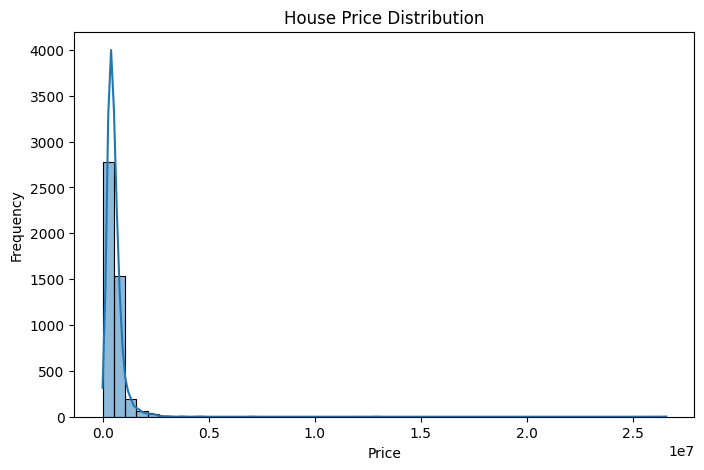

In [143]:
# 3️⃣ Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


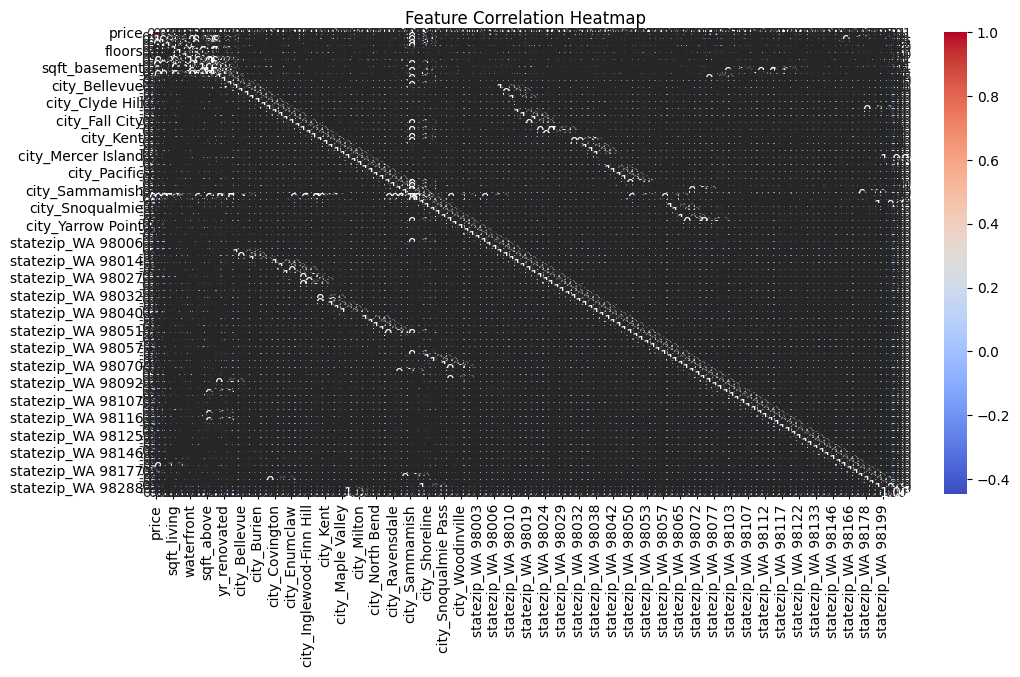

In [144]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

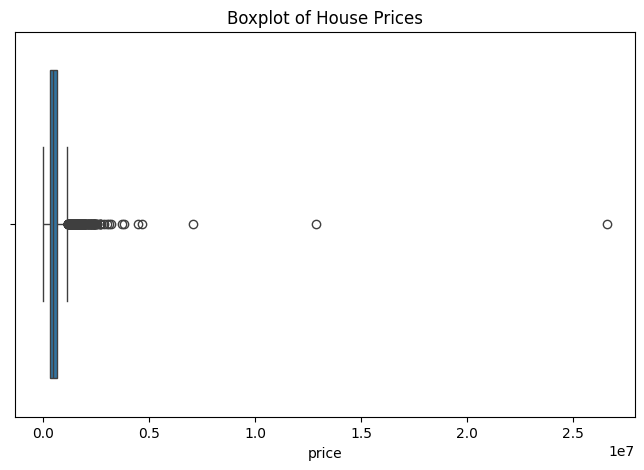

In [145]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["price"])
plt.title("Boxplot of House Prices")
plt.show()

In [146]:
# Feature Training
current_year = 2025
df["house_age"] = current_year - df["yr_built"]
df["was_renovated"] = df["yr_renovated"].apply(lambda x: 1 if x > 0 else 0)
df["price_per_sqft"] = df["price"] / df["sqft_living"]

In [147]:
Q1 = df["price"].quantile(0.25)  # 25th percentile
Q3 = df["price"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]
print(f"Original dataset size: {df.shape[0]}, After removing outliers: {df_no_outliers.shape[0]}")


Original dataset size: 4600, After removing outliers: 4360


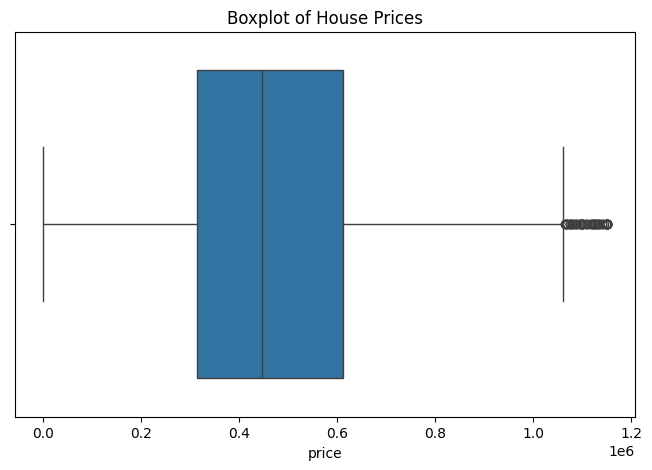

In [148]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_no_outliers["price"])
plt.title("Boxplot of House Prices")
plt.show()

In [149]:

# 4️⃣ Split the Data
X = df_no_outliers.drop(columns=["price"])
y = df_no_outliers["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5️⃣ Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 6️⃣ Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Absolute Error: 53457.817790749046
Mean Squared Error: 7401323588.684501
R² Score: 0.8506219563419283


In [150]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

In [151]:
print("Linear Regression Performance:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

print("\nRandom Forest Regressor Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_pred))
print("Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print("R² Score:", rf_model.score(X_test, y_test))

Linear Regression Performance:
Mean Absolute Error: 53457.817790749046
Mean Squared Error: 7401323588.684501
R² Score: 0.8506219563419283

Random Forest Regressor Performance:
Mean Absolute Error: 7082.099268236296
Mean Squared Error: 320744740.29023117
R² Score: 0.9935265332958254
